In [1]:
from grizli import combine
import sympy as sp
from astropy.io import fits
from astropy.cosmology import Planck13 as cosmo
from astropy.table import Table
from scipy.interpolate import interp1d, interp2d
from scipy.ndimage import interpolation
from astropy import wcs
import pysynphot as S
import matplotlib.pyplot as plt
from matplotlib import gridspec
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})
cmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.2, as_cmap=True)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# fp = '/Users/Vince.ec/Clear_data/flt_files/'
fp = '/Users/vestrada/Clear_data/flt_files/'

###read in all flt files
flt_list=glob(fp + 'ic*flt.fits')

###select only imaging files in the south
imgflt=[]
for i in range(len(flt_list)):
    indat=fits.open(flt_list[i])
    if indat[0].header['OBSTYPE'] ==  'IMAGING' and indat[0].header['DEC_TARG'] > 0:
        imgflt.append(flt_list[i])
        print indat[0].header['TARGNAME']

GDN3
GDN3
GDN6
GDN6
GDN7
GDN7
GDN8
GDN8
GDN11
GDN11
GDN12
GDN12
GDN17
GDN17
GDN18
GDN18
GDN19
GDN19
GDN20
GDN20
GDN21
GDN21
GDN22
GDN22
GDN23
GDN23
GDN25
GDN25
GDN26
GDN26
GN7
GN7
GN7
GN7
GN7
GN7
GN7
GN7
GN7
GN7
GN5
GN5
GN5
GN5
GN5
GN5
GN5
GN5
GN5
GN5
GN1
GN1
GN1
GN1
GN1
GN1
GN1
GN1
GN1
GN1
GN2
GN2
GN2
GN2
GN2
GN2
GN2
GN2
GN3
GN3
GN3
GN3
GN3
GN3
GN3
GN3
GN3
GN3
GN4
GN4
GN4
GN4
GN4
GN4
GN4
GN4
GN4
GN4
GN2
GN2


In [4]:
### combine all flts into one fits file
combine.combine_flt(files=imgflt,output='../data/GSD_com.fits')

The following tasks in the stwcs.gui package can be run with TEAL:
     apply_headerlet          archive_headerlet          attach_headerlet     
     delete_headerlet         extract_headerlet         headerlet_summary     
    restore_headerlet             updatewcs              write_headerlet


The following task in the fitsblender package can be run with TEAL:
                                  blendheaders                                  
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       imagefindpars           mapreg              photeq       
     pixreplace           pixtopix            pixtosky        refimagefindpars  
     resetbits          runastrodriz          skytopix           tweakback      
      tweakreg           updatenpol
Maximum shift (x, y) = (3953.6, 3251.6), pad=4000
  1 

In [6]:
### load in combined fits file
img_data = fits.open('../data/GSD_com.fits')
img = img_data[1].data

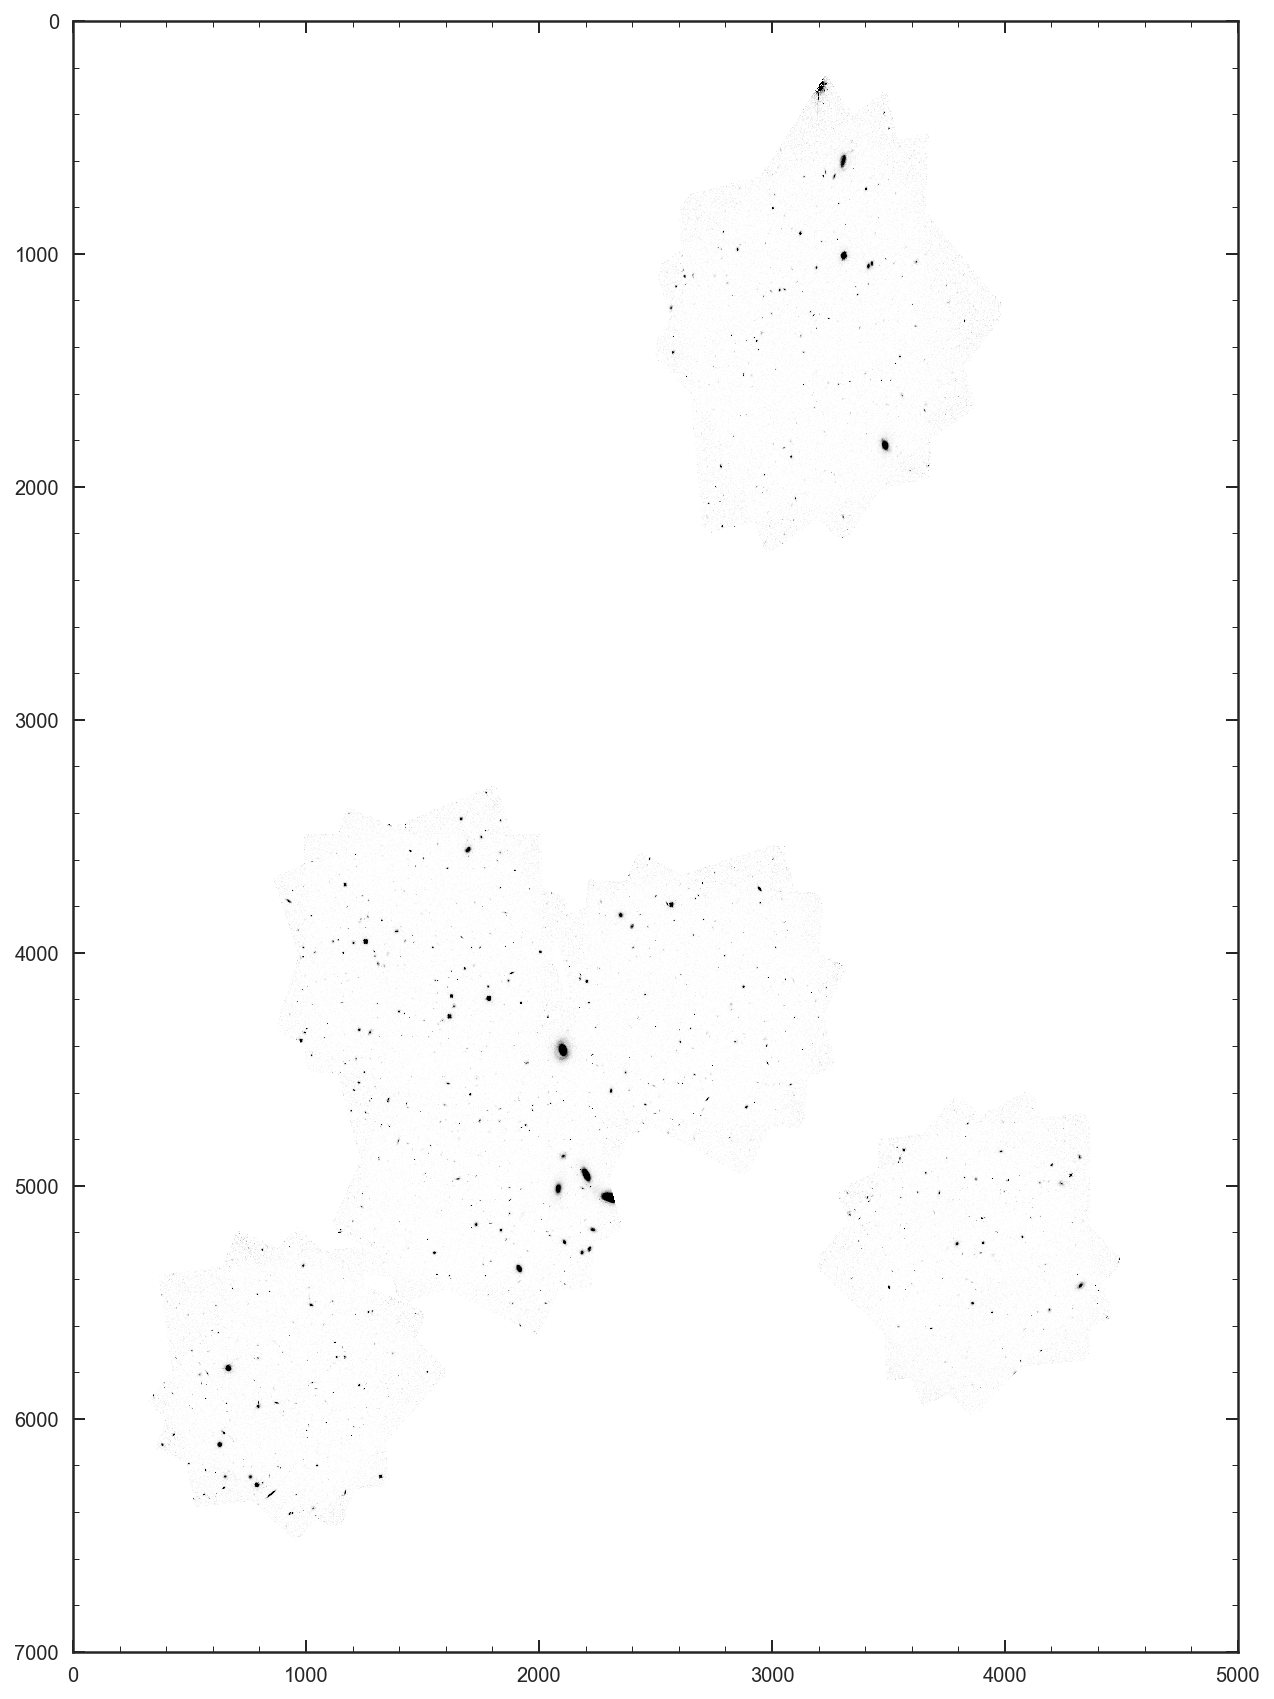

In [11]:
### plot the **cropped** feild

plt.figure(figsize=[15,15])
plt.imshow(img[500:7500,3000:8000],vmin=0,vmax=1)
plt.savefig('../plots/GSD_all.pdf',bbox_inches = 'tight')
